In [1]:
import os
import numpy as np
import tensorflow as tf
import random
import seaborn as sns
import matplotlib.pyplot as plt
 
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop, Adam, SGD
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras.applications.vgg16 import VGG16, preprocess_input
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [1]:
plant_type=['Apple___Apple_scab','Apple___Black_rot','Apple___Cedar_apple_rust','Apple___healthy',
           'Blueberry___healthy','Cherry_(including_sour)___healthy','Cherry_(including_sour)___Powdery_mildew',
           'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot','Corn_(maize)___Common_rust_','Corn_(maize)___healthy','Corn_(maize)___Northern_Leaf_Blight',
           'Grape___Black_rot','Grape___Esca_(Black_Measles)','Grape___healthy','Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
           'Orange___Haunglongbing_(Citrus_greening)','Peach___Bacterial_spot','Peach___healthy',
           'Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___healthy','Potato___Late_blight',
           'Raspberry___healthy','Soybean___healthy','Squash___Powdery_mildew','Strawberry___healthy','Strawberry___Leaf_scorch',
           'Tomato___Bacterial_spot','Tomato___Early_blight','Tomato___healthy','Tomato___Late_blight','Tomato___Leaf_Mold',
           'Tomato___Septoria_leaf_spot','Tomato___Spider_mites Two-spotted_spider_mite','Tomato___Target_Spot','Tomato___Tomato_mosaic_virus','Tomato___Tomato_Yellow_Leaf_Curl_Virus']

In [4]:
print(plant_type[15])
print(plant_type[21])

Orange___Haunglongbing_(Citrus_greening)
Potato___healthy


In [3]:
def read_and_process_image(data_dir,width, height, channels=3, preprocess=False):
    
    train_classes= [data_dir +  i for i in os.listdir(data_dir) ]
    train_images = []
    for train_class in train_classes:
        train_images= train_images + [train_class + "/" + i for i in os.listdir(train_class)]
    
    random.shuffle(train_images)
    
    def read_image(file_path, preprocess):
        img = image.load_img(file_path, target_size=(height, width))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        
        if preprocess:
            x = preprocess_input(x)
        return x
    
    def prep_data(images, proprocess):
        count = len(images)
        data = np.ndarray((count, height, width, channels), dtype = np.float32)
        
        for i, image_file in enumerate(images):
            image = read_image(image_file, preprocess)
            data[i] = image
        
        return data
    
    def read_labels(file_path):
        labels = []
        for i in file_path:
            if plant_type[0] in i:
                label = 0
            elif plant_type[1] in i:
                label = 1
            elif plant_type[2] in i:
                label = 2
            elif plant_type[3] in i:
                label = 3
            elif plant_type[4] in i:
                label = 4
            elif plant_type[5] in i:
                label = 5
            elif plant_type[6] in i:
                label = 6
            elif plant_type[7] in i:
                label = 7
            elif plant_type[8] in i:
                label = 8
            elif plant_type[9] in i:
                label = 9
            elif plant_type[10] in i:
                label = 10
            elif plant_type[11] in i:
                label = 11
            elif plant_type[12] in i:
                label = 12
            elif plant_type[13] in i:
                label = 13
            elif plant_type[14] in i:
                label = 14
            elif plant_type[15] in i:
                label = 15
            elif plant_type[16] in i:
                label = 16
            elif plant_type[17] in i:
                label = 17
            elif plant_type[18] in i:
                label = 18
            elif plant_type[19] in i:
                label = 19
            elif plant_type[20] in i:
                label = 20
            elif plant_type[21] in i:
                label = 21
            elif plant_type[22] in i:
                label = 22
            elif plant_type[23] in i:
                label = 23
            elif plant_type[24] in i:
                label = 24
            elif plant_type[25] in i:
                label = 25
            elif plant_type[26] in i:
                label = 26
            elif plant_type[27] in i:
                label = 27
            elif plant_type[28] in i:
                label = 28
            elif plant_type[29] in i:
                label = 29
            elif plant_type[30] in i:
                label = 30
            elif plant_type[31] in i:
                label = 31
            elif plant_type[32] in i:
                label = 32
            elif plant_type[33] in i:
                label = 33
            elif plant_type[34] in i:
                label = 34
            elif plant_type[35] in i:
                label = 35
            elif plant_type[36] in i:
                label = 36
            elif plant_type[37] in i:
                label = 37
            labels.append(label)
        
        return labels
    
    X = prep_data(train_images, preprocess)
    labels = read_labels(train_images)
    
    assert X.shape[0] == len(labels)
    
    print("Train shape: {}".format(X.shape))
    
    return X, labels


In [4]:
WIDTH = 224
HEIGHT = 224
CHANNELS = 3
X, y = read_and_process_image('./PlantVillage/train/',width=WIDTH, height=HEIGHT, channels=CHANNELS)
test_X, test_y = read_and_process_image('./PlantVillage/val/',width=WIDTH, height=HEIGHT, channels=CHANNELS)


Train shape: (44016, 224, 224, 3)
Train shape: (11004, 224, 224, 3)


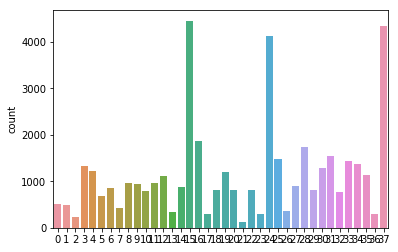

In [5]:
sns.countplot(y)

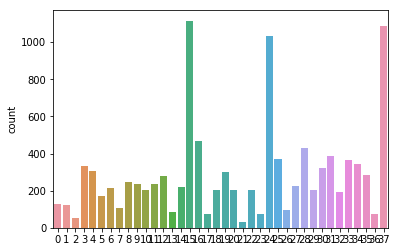

In [6]:
sns.countplot(test_y)

In [7]:
train_y = np_utils.to_categorical(y)
test_y = np_utils.to_categorical(test_y)

In [8]:
def show_picture(X, idx):
    plt.figure(figsize=(10,5), frameon=True)
    img = X[idx,:,:,::-1]
    img = img/255
    plt.imshow(img)
    plt.show()


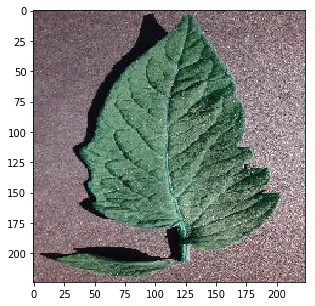

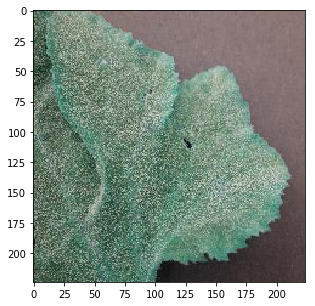

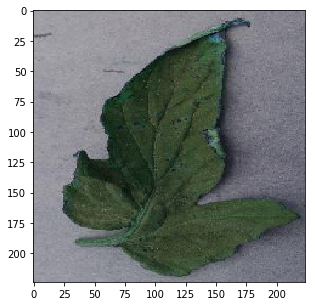

In [9]:
 for idx in range(0,10):
    show_picture(X, idx)

In [10]:
def vgg16_model(input_shape= (HEIGHT,WIDTH,CHANNELS)):
    vgg16 = VGG16(include_top=False, weights='imagenet',input_shape=input_shape)
    
    for layer in vgg16.layers:
        layer.trainable = False
    last = vgg16.output

    x = Flatten()(last)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(len(plant_type), activation='softmax')(x)
    
    model = Model(inputs=vgg16.input, outputs=x)
    
    return model

In [11]:
model_vgg16 = vgg16_model()
model_vgg16.summary()
model_vgg16.compile(loss='categorical_crossentropy',optimizer = Adam(0.0001), metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)

In [12]:
history = model_vgg16.fit(X,train_y, validation_data=(test_X, test_y),epochs=20,batch_size=100,verbose=True)
score = model_vgg16.evaluate(test_X, test_y, verbose=0)
print("Large CNN Error: %.2f%%" %(100-score[1]*100))

Instructions for updating:
Use tf.cast instead.
Train on 44016 samples, validate on 11004 samples
Epoch 1/20
44016/44016 [==============================] - 226s 5ms/step - loss: 3.8940 - acc: 0.2991 - val_loss: 1.8601 - val_acc: 0.5443
Epoch 2/20
44016/44016 [==============================] - 222s 5ms/step - loss: 2.0284 - acc: 0.4927 - val_loss: 1.3877 - val_acc: 0.6684
Epoch 3/20
44016/44016 [==============================] - 223s 5ms/step - loss: 1.7028 - acc: 0.5812 - val_loss: 1.2146 - val_acc: 0.7118
Epoch 4/20
44016/44016 [==============================] - 223s 5ms/step - loss: 1.5460 - acc: 0.6205 - val_loss: 1.1317 - val_acc: 0.7211
Epoch 5/20
44016/44016 [==============================] - 222s 5ms/step - loss: 1.4531 - acc: 0.6384 - val_loss: 1.0433 - val_acc: 0.7413
Epoch 6/20
44016/44016 [==============================] - 220s 5ms/step - loss: 1.3701 - acc: 0.6555 - val_loss: 1.0197 - val_acc: 0.7446
Epoch 7/20
44016/44016 [==============================] - 218s 5ms/step - 

In [14]:
model_vgg16.save("model-base-VGG16.h5")